# Lista 1

## `Questão 1`
Considere o conjunto de dados disponível em `artificial1d.csv` organizado em
duas colunas, `x` e `y`. Seja um modelo de regressão linear: 
$$\begin{aligned}
\hat{y} = f(x).
\end{aligned}$$

A) Apresente os parâmetros do modelo e o MSE (erro quadrático médio) obtidos pelo algoritmo OLS (mínimos quadrados ordinários). Plote a reta resultante sobre os dados.  
  
B) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem obtidos pelo algoritmo GD (gradiente descendente). Plote a reta re- sultante sobre os dados.  
  
C) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem obtidos pelo algoritmo SGD (gradiente descendente estocástico). Plote a reta resultante sobre os dados.


In [11]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [12]:
artificial_data = np.loadtxt('./artificial1d.csv', delimiter=',')
artificial_data.shape

(30, 2)

### `OLS (mínimos quadrados ordinários)`

In [13]:
def mse_ols(x: np.ndarray, w: np.ndarray, y: np.ndarray):
    pred = x @ w
    error = y - pred
    mse = (error ** 2).mean()

    return mse

def rmse_ols(x: np.ndarray, w: np.ndarray, y: np.ndarray):
    return np.sqrt(mse_ols(x, w, y))

In [14]:
def add_independent_term_column(x: np.ndarray):
    return np.hstack((np.ones((x.shape[0], 1)), x))

In [19]:
def ols(x: np.ndarray, y: np.ndarray):
    # Entradas do modelo
    X = x.copy()

    # Saída do modelo
    Y = y.copy()

    # Adicionando uma coluna de 1's para o termo independente
    # X = add_independent_term_column(X)

    # Forma literal de calcular w
    # w_ols = np.linalg.inv(X.T @ X) @ X.T @ y

    # Forma mais eficiente de calcular w, pois não é necessário calcular a inversa de X.T @ X
    w_ols = np.linalg.solve(X.T @ X, X.T @ y)

    # Calculando o MSE
    mse = mse_ols(X, w_ols, Y)
    
    return w_ols, mse

In [20]:
x_artificial_data = artificial_data[:, :-1]
x_artificial_data = add_independent_term_column(x_artificial_data)
x_artificial_data.shape

(30, 2)

In [21]:
y_artificial_data = artificial_data[:, [-1]]
y_artificial_data.shape

(30, 1)

In [22]:
w_artificial_data_ols, mse_artificial_data_ols = ols(x_artificial_data, y_artificial_data)

#### Parâmetros do modelo e **MSE (Erro Quadrático Médio)** obitidos pelo algoritmo

In [23]:
print(f"Parâmetros OLS: W0: {w_artificial_data_ols[0][0]}, W1: {w_artificial_data_ols[1][0]}")

Parâmetros OLS: W0: 0.06761792463834032, W1: 1.5748651690368318


In [24]:
print(f"MSE OLS: {mse_artificial_data_ols}")

MSE OLS: 0.21340090132936992


#### Plote da reta resultante sobre os dados

(50, 1)

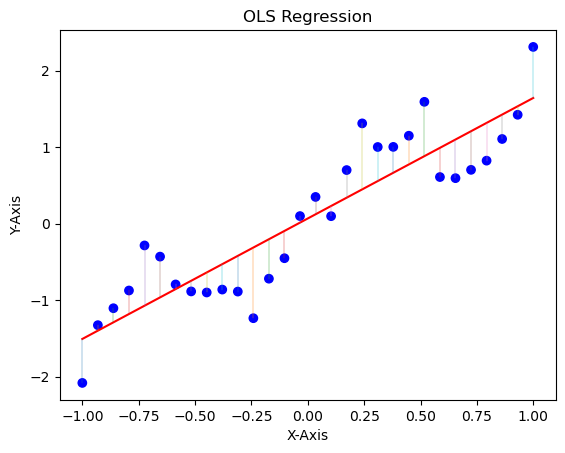

In [40]:
fig, ax = plt.subplots()

x_range_ols = np.linspace(x_artificial_data.min(), x_artificial_data.max(), 50).reshape(50, -1)
y_range_ols = w_artificial_data_ols[0] + w_artificial_data_ols[1] * x_range_ols

ax.set_title("OLS Regression")
ax.set_ylabel("Y-Axis")
ax.set_xlabel("X-Axis")

ax.scatter(x_artificial_data[:, 1:], y_artificial_data, color='blue', marker='o', linestyle='')
ax.plot(x_range_ols, y_range_ols, color='red')

for i in range(len(x_artificial_data)):
    ax.plot([x_artificial_data[:, 1:][i], x_artificial_data[:, 1:][i]], [y_artificial_data[i], w_artificial_data_ols[0] + w_artificial_data_ols[1] * x_artificial_data[:, 1:][i]], linewidth='0.3')

plt.show()

### `GD - Gradiente Descendente`

In [41]:
def mse_gd(x: np.ndarray, w: np.ndarray, y: np.ndarray):
    pred = x @ w
    error = y - pred
    mse = (error * error).mean()
    # mse1 = (error ** 2).sum() / error.shape[0]
    # print(f'mse: {mse}')
    # print(f'mse 1: {mse1}')

    return mse

In [50]:
# Gradiente descendente
def gd(x: np.ndarray, y: np.ndarray, alpha: float = 0.001, max_iterations: int = 100000, stopping_error: float = 1e-10):
    # Importando features e saídas
    X = x.copy()
    Y = y.copy()

    # Adicionando uma coluna de 1's para o termo independente
    # X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Inicializando os pesos
    w_gd = np.zeros((X.shape[1], 1))

    # Taxa de aprendizado
    # alpha = 0.00001

    # Número máximo de iterações
    # max_iterations = 100000

    errors_list_gd = np.empty((max_iterations, X.shape[0]))
    mse_list_gd = np.empty((max_iterations, 1))

    # Gradiente descendente
    for iter in range(max_iterations):

        # Calculando o erro
        pred_gd = X @ w_gd
        error_gd = Y - pred_gd
        
        w_gd[0] = w_gd[0] + alpha * error_gd.mean(axis = 0)
        w_gd[1:] = w_gd[1:] + alpha * (X[:,[1]].T @ error_gd) / X.shape[0]

        # Calculando o MSE e registrando o MSE e os Erros
        errors_list_gd[[iter], :] = error_gd.reshape(1, -1)
        mse_list_gd[iter] = mse_gd(X, w_gd, Y)

        # Parar caso o erro esteja abaixo do mínimo aceitável
        # if(mse < stopping_error):
        #     print(f'GD encerrado precocemente pois os erros estão baixos o suficiente')
        #     break
    
    return w_gd, mse_gd(X, w_gd, y), errors_list_gd, mse_list_gd

In [51]:
w_artificial_data_gd, mse_artificial_data_gd, errors_list_gd, mse_list_gd = gd(x_artificial_data, y_artificial_data, alpha=0.01, max_iterations=1750)

#### Parâmetros do modelo e **MSE (Erro Quadrático Médio)** final obitidos pelo algoritmo

In [52]:
w_artificial_data_gd

array([[0.06761792],
       [1.57181512]])

In [53]:
mse_artificial_data_gd

0.2134042161143472

#### Plote da reta resultante sobre os dados

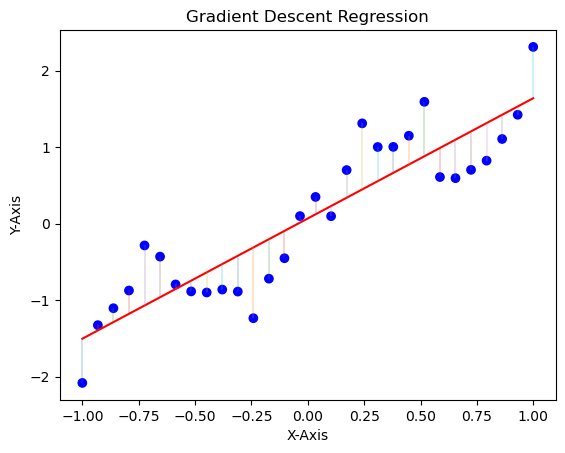

In [54]:
fig, ax = plt.subplots()

x_range_gd = np.linspace(x_artificial_data.min(), x_artificial_data.max(), 50).reshape(50, -1)
y_range_gd = w_artificial_data_gd[0] + w_artificial_data_gd[1] * x_range_gd

ax.set_title("Gradient Descent Regression")
ax.set_ylabel("Y-Axis")
ax.set_xlabel("X-Axis")

ax.scatter(x_artificial_data[:, 1:], y_artificial_data, color='blue', marker='o', linestyle='')
ax.plot(x_range_gd, y_range_gd, color='red')

for i in range(len(x_artificial_data)):
    ax.plot([x_artificial_data[:, 1:][i], x_artificial_data[:, 1:][i]], [y_artificial_data[i], w_artificial_data_gd[0] + w_artificial_data_gd[1] * x_artificial_data[:, 1:][i]], linewidth='0.3')

plt.show()

#### Plote da curva de aprendizagem

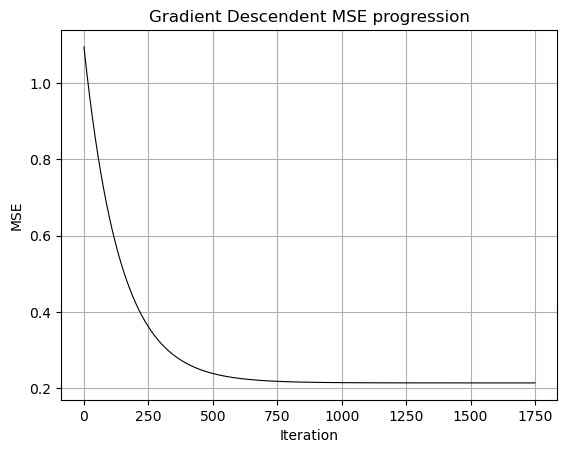

In [55]:
fig, ax = plt.subplots()

ax.set_title("Gradient Descendent MSE progression")
ax.set_ylabel("MSE")
ax.set_xlabel("Iteration")

ax.plot(np.arange(mse_list_gd.shape[0]), mse_list_gd, color='black', linewidth='0.8')
ax.grid(True)

plt.show()

### `SGD - Gradiente Descendente Estocástico`

In [61]:
# Gradiente descendente estocástico
def sgd(x: np.ndarray, y: np.ndarray, alpha: float = 0.001, max_epochs: int = 1000, stopping_error: float = 1e-10):
    # Importando features e saídas
    X = x.copy()
    Y = y.copy()

    # Adicionando uma coluna de 1's para o termo independente
    # X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Inicializando os pesos
    w_sgd = np.zeros((X.shape[1], 1))

    # Taxa de aprendizado
    # alpha = 0.00001

    # Número máximo de epochs
    # max_epochs = 100000

    errors_list_sgd = np.empty((max_epochs * X.shape[0], X.shape[0]))
    mse_list_sgd = np.empty((max_epochs * X.shape[0], 1))

    # Gradiente descendente estocástico
    for epoch in range(max_epochs):
        # Permutando dados (entradas e saídas)
        XY = np.hstack((X, Y))
        XY = np.random.permutation(XY)
        X = XY[:, :-1]
        Y = XY[:, [-1]]

        for entry in range(X.shape[0]):
            # Calculando o erro
            pred_sgd = X[entry] @ w_sgd
            error_sgd = Y[entry] - pred_sgd
            
            w_sgd[0] = w_sgd[0] + alpha * error_sgd
            w_sgd[1:] = w_sgd[1:] + alpha * (X[entry,[1]].T * error_sgd)

            # Calculando o MSE e registrando o MSE e os Erros
            errors_list_sgd[[epoch * X.shape[0] + entry], :] = error_sgd.reshape(1, -1)
            mse_list_sgd[epoch * X.shape[0] + entry] = mse_gd(X, w_sgd, Y)

            # Parar caso o erro esteja abaixo do mínimo aceitável
            # if(mse < stopping_error):
            #     print(f'SGD encerrado precocemente pois os erros estão baixos o suficiente')
            #     break
    
    return w_sgd, mse_gd(X, w_sgd, y), errors_list_sgd, mse_list_sgd

In [62]:
w_artificial_data_sgd, mse_artificial_data_sgd, errors_list_sgd, mse_list_sgd = sgd(x_artificial_data, y_artificial_data, alpha= 0.01, max_epochs=60)

#### Parâmetros do modelo e **MSE (Erro Quadrático Médio)** final obitidos pelo algoritmo

In [63]:
w_artificial_data_sgd

array([[0.07280588],
       [1.57387102]])

In [64]:
mse_artificial_data_sgd

1.8889908452497626

#### Plote da reta resultante sobre os dados

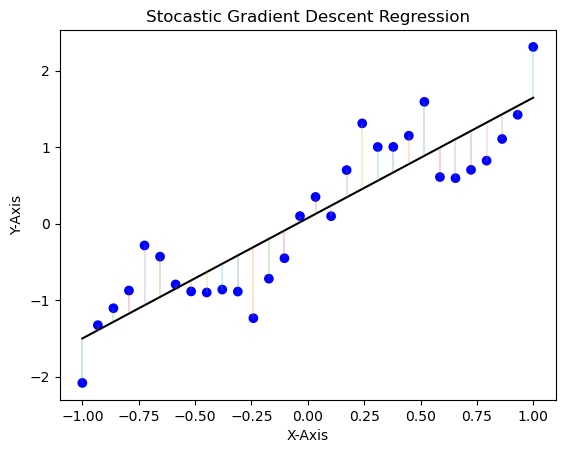

In [66]:
fig, ax = plt.subplots()

x_range_sgd = np.linspace(x_artificial_data.min(), x_artificial_data.max())
y_range_sgd = w_artificial_data_sgd[0] + w_artificial_data_sgd[1] * x_range_sgd

ax.set_title("Stocastic Gradient Descent Regression")
ax.set_ylabel("Y-Axis")
ax.set_xlabel("X-Axis")

ax.scatter(x_artificial_data[:, 1:], y_artificial_data, color='blue', marker='o', linestyle='')
ax.plot(x_range_sgd, y_range_sgd, color='black')

for i in range(len(x_artificial_data)):
    ax.plot([x_artificial_data[:, 1:][i], x_artificial_data[:, 1:][i]], [y_artificial_data[i], w_artificial_data_gd[0] + w_artificial_data_sgd[1] * x_artificial_data[:, 1:][i]], linewidth='0.3')

plt.show()

#### Plote da curva de aprendizagem

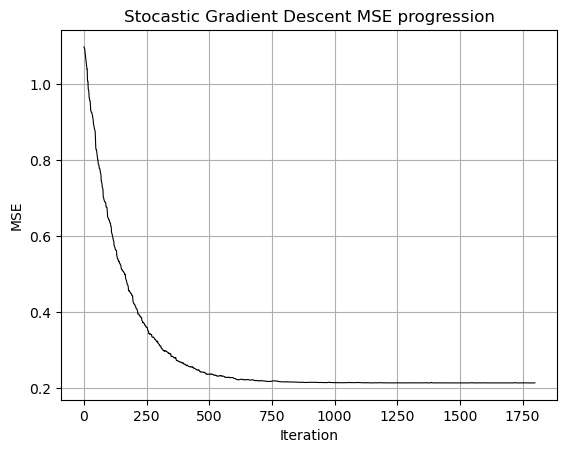

In [67]:
fig, ax = plt.subplots()

ax.set_title("Stocastic Gradient Descent MSE progression")
ax.set_ylabel("MSE")
ax.set_xlabel("Iteration")

ax.plot(np.arange(mse_list_sgd.shape[0]), mse_list_sgd, color='black', linewidth='0.8')
ax.grid(True)

plt.show()

## `Questão 2`
Considere o conjunto de dados disponível em california.csv, organizado em 9 colunas, sendo as 8 primeiras colunas os atributos e a última coluna a saída.  
Os 8 atributos são usados na predição da mediana de preços de casas em distritos da Califórnia na década de 1990.

In [68]:
california_data = np.loadtxt('./california.csv', delimiter=',')
california_data.shape

(1000, 9)

In [69]:
x_california_data = california_data[:, :-1]
x_california_data.shape

(1000, 8)

In [70]:
y_california_data = california_data[:, [-1]]
y_california_data.shape

(1000, 1)

In [71]:
def polify(x: np.ndarray, degrees: int):
    X = x.copy()

    for degree in range(2, degrees + 1):
        X_next_degree = x ** (degree)
        X = np.hstack((X, X_next_degree))

    return X  

In [72]:
def split_train_test(x: np.ndarray, y: np.ndarray, split: float):
    # Check split value
    if not (0.0 <= split <= 1.0):
        raise ValueError("Split should be between 0 and 1")
    
    # Permutate the data
    xy = np.random.permutation(np.hstack((x, y)))

    # Split the data
    split_index = int(np.rint(xy.shape[0] * split))
    train = xy[:split_index, :]
    test = xy[split_index:, :]

    return train, test

MSE OLS - Polinômio de grau 1 :
0.4528321309684065


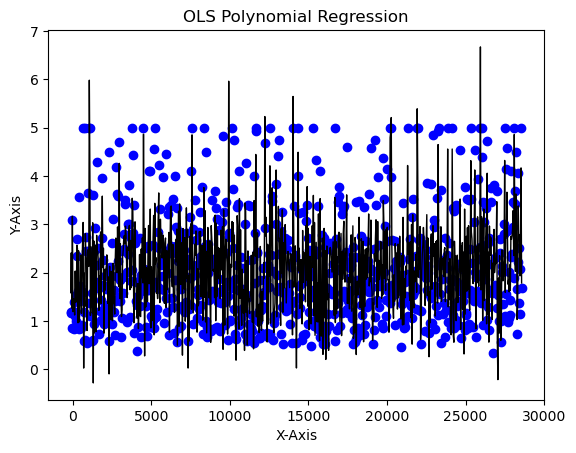

MSE OLS - Polinômio de grau 2 :
0.43154652419039313


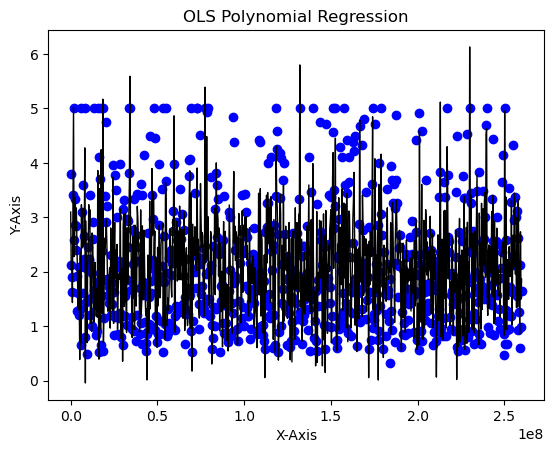

MSE OLS - Polinômio de grau 3 :
0.3759521963909405


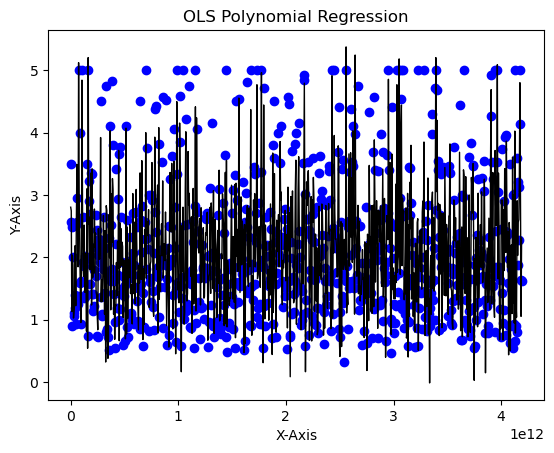

MSE OLS - Polinômio de grau 4 :
0.38132740432655793


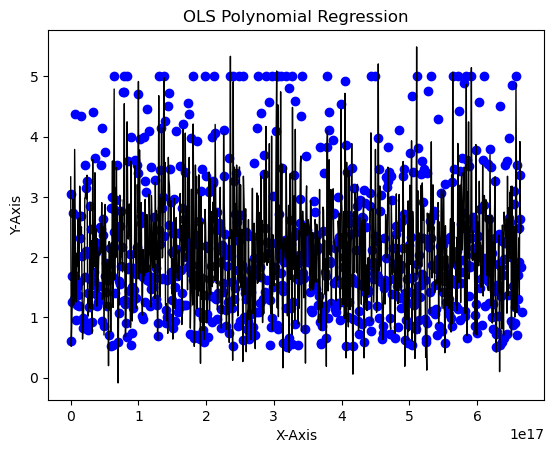

MSE OLS - Polinômio de grau 5 :
0.38504074819794


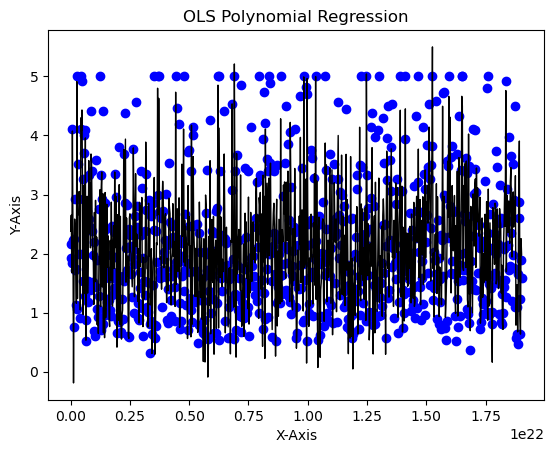

MSE OLS - Polinômio de grau 6 :
0.34279971749409527


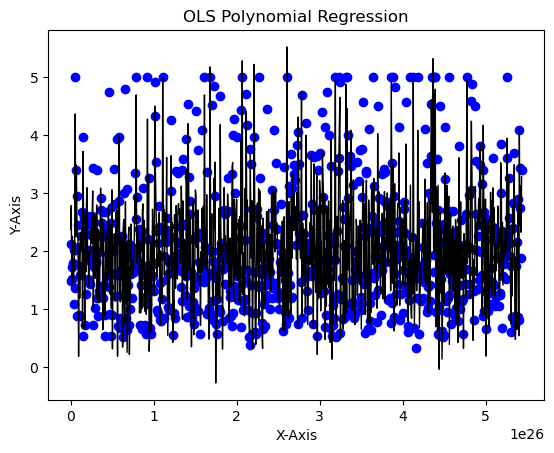

MSE OLS - Polinômio de grau 7 :
0.3670765997426665


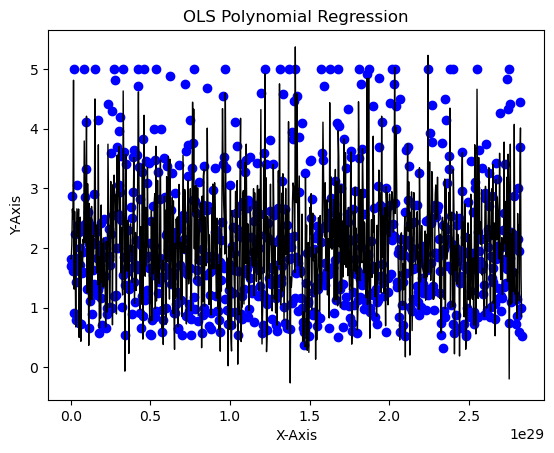

MSE OLS - Polinômio de grau 8 :
0.35453345278498943


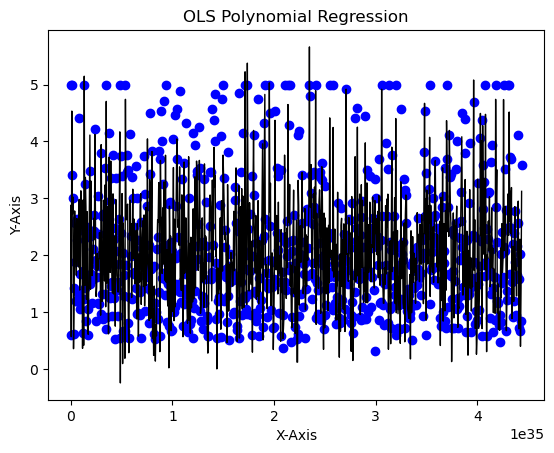

MSE OLS - Polinômio de grau 9 :
0.5055529059383873


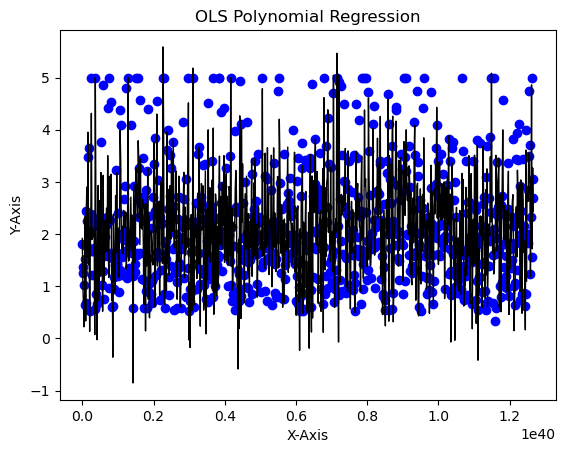

MSE OLS - Polinômio de grau 10 :
0.33559350475166483


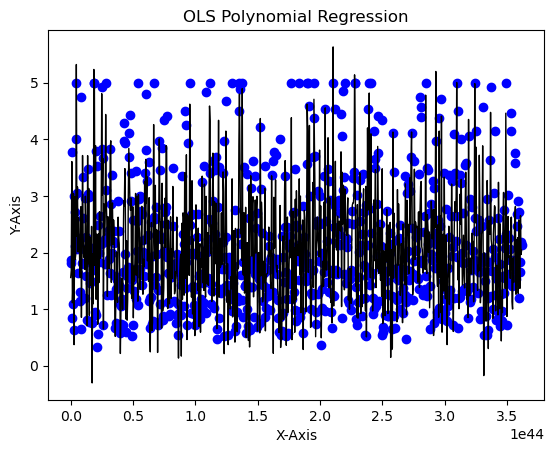

MSE OLS - Polinômio de grau 11 :
0.3635408146200255


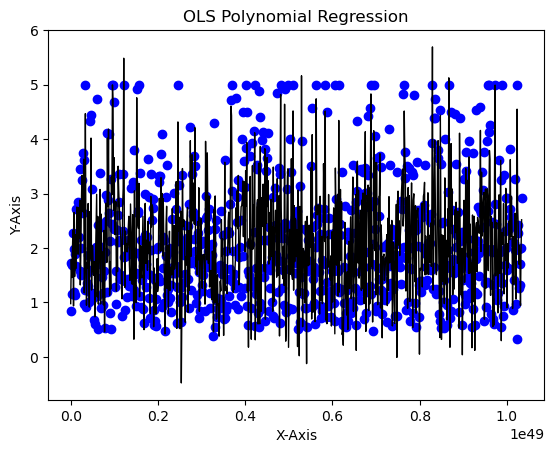

MSE OLS - Polinômio de grau 12 :
2000.188531707219


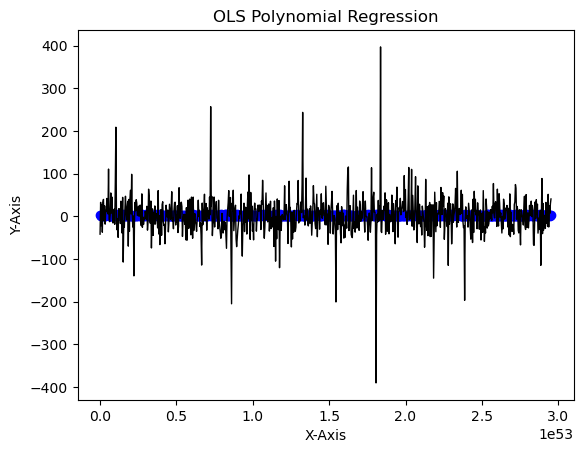

MSE OLS - Polinômio de grau 13 :
0.632951495026977


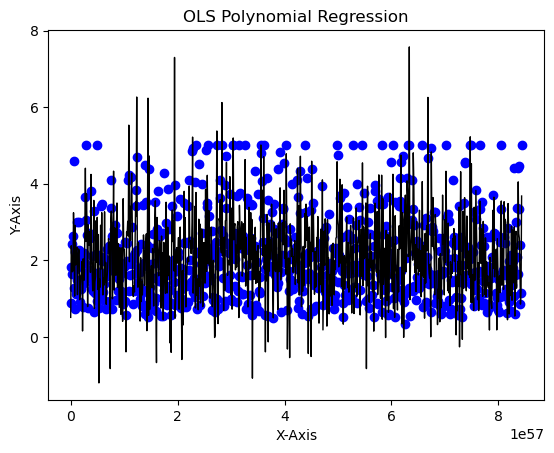

In [76]:
for e in range(1, 14):
    x_california_poly_data = polify(x_california_data, e)

    california_train_data, california_test_data = split_train_test(x_california_poly_data, y_california_data, 0.8)

    x_california_poly_train_data = add_independent_term_column(california_train_data[:, :-1])
    y_california_poly_train_data = california_train_data[:, [-1]]

    w_california_poly_data_ols, mse_california_data_ols = ols(x_california_poly_train_data, y_california_poly_train_data)

    print(f"MSE OLS - Polinômio de grau {e} :\n{mse_california_data_ols}")

    fig, ax = plt.subplots()

    x_range_poly = np.linspace(x_california_poly_train_data.min(), x_california_poly_train_data.max(), 800).reshape(-1, 1)
    y_range_poly = x_california_poly_train_data @ w_california_poly_data_ols

    ax.set_title("OLS Polynomial Regression")
    ax.set_ylabel("Y-Axis")
    ax.set_xlabel("X-Axis")

    ax.scatter(x_range_poly, y_california_poly_train_data, color='blue', marker='o')
    ax.plot(x_range_poly, y_range_poly, color='black', linewidth='1.0')

    plt.show()